In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Defining the parameters
alpha = 3/2
n_trials = 100  # Number of independent sequences
sample_sizes = [10, 100, 1000]  # Sample sizes to investigate

# Define the Functions
# Function to generate Pareto samples using Inverse CDF Sampling Method
def pareto_sampling(alpha, size):
    """ Returns an array of Pareto samples of size 'size' """
    U = np.random.uniform(0, 1, size) # Uniform Distribution
    X = (1 / (1 - U))**(1 / alpha)  # Inverse Sampling Method
    return X

# Monte Carlo Simulation
def monte_carlo_pareto(alpha, sample_size, n_trials):
    """ Returns an array of the mean of the samples of size 'n_trials' """
    sample_means = []
    for _ in range(n_trials):
        samples = pareto_sampling(alpha, sample_size)
        sample_mean = np.mean(samples)
        sample_means.append(sample_mean)
    return np.array(sample_means)

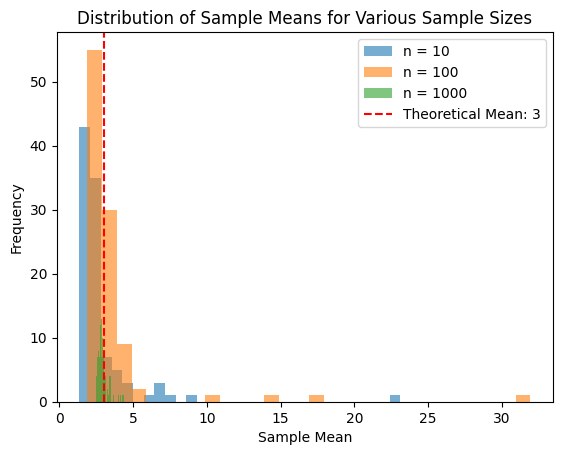

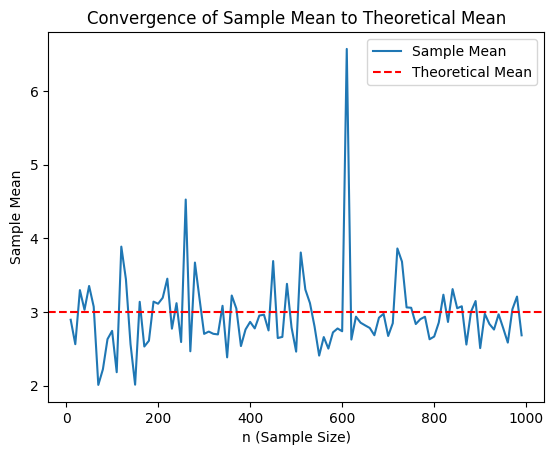

In [ ]:
# Investigate convergence at various sample sizes
for n in sample_sizes:
    sample_means = monte_carlo_pareto(alpha, n, n_trials)

    # Plot histogram of sample means
    plt.hist(sample_means, bins=30, alpha=0.6, label=f'n = {n}')

# Show the theoretical mean
plt.axvline(x=3, color='r', linestyle='--', label='Theoretical Mean: 3')

# Labelling the axes
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means for Various Sample Sizes')
plt.legend()
plt.show()

# Checking for Convergence
n_values = np.arange(10, 1000, 10)
means_convergence = [np.mean(pareto_sampling(alpha, n)) for n in n_values]

plt.plot(n_values, means_convergence, label='Sample Mean')
plt.axhline(y=3, color='r', linestyle='--', label='Theoretical Mean')
plt.xlabel('n (Sample Size)')
plt.ylabel('Sample Mean')
plt.title('Convergence of Sample Mean to Theoretical Mean')
plt.legend()
plt.show()
